# CoinMarketCap web scraper, analysis and visualisation of data

Author: Marcel Blagotinšek

## Introduction

With this project, my goal in the first part is to collect (scrape and extract) historical data on the major cryptocurrencies, then process/transform this data for analysis and visualization purposes, and finally save it. The second part involves analyzing and visualizing the data. First I visualize price movement of cryptocurrencies over the observed period of time. Next, I proceed to analyze the volatility and trends of cryptocurrencies, which certainly play a significant role in investors' decisions. By manipulating the data, I present the distribution of weekly returns and display the trends in cryptocurrency price, market cap and volume movements.


## Scraping

First we have to import libraries that will be of use in our project.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

The observed time period will be the span of 4 years (approximately 192 weeks). We could scrape data from longer periods of time but that would be very time-consuming. We begin extraction by initializing data lists for columns and creating empty dataframe, then we individually scrape date list from CoinMarketCap. We use this list for scraping on each week by looping through dates (urls). Below is dataframe containing data on all cryptocurrencies

In [2]:
from scraper import get_data

df1 = get_data()

## Transformation (cleaning and formatting)

Following part transforms the 'Date' column to a datetime data type. It then cleans the 'Market Cap', 'Price', 'Circulating Supply', and 'Volume (24hr)' columns by removing dollar signs and commas. The code also replaces special characters (e.g., '--', '<', '>', '%') in the '% 7d' column. Next, it converts the cleaned columns to numeric data types, replacing invalid values with NaN. Shown below is first 10 rows of the transformed table.

In [3]:
from prettify import clean_format
df2 = clean_format(df1)
df2.head(10)

,Date,Name,Symbol,Market Cap ($),Price ($),Circulating Supply ($),Volume (24hr) ($),% 7d
0,2020-11-22,Bitcoin,BTC,3.407902e+11,18370.000,18551450,4.128043e+10,15.13
1,2020-11-22,Ethereum,ETH,6.336104e+10,558.070,113536390,2.196705e+10,24.69
2,2020-11-22,XRP,XRP,2.011212e+10,0.444,45328155123,1.909768e+10,64.55
3,2020-11-22,Tether,USDT,1.845487e+10,0.999,18469593301,8.018738e+10,-0.14
4,2020-11-22,Chainlink,LINK,5.684167e+09,14.440,393509556,2.199639e+09,19.16
5,2020-11-22,Litecoin,LTC,5.452445e+09,82.700,65927052,6.285047e+09,32.79
6,2020-11-22,Bitcoin Cash,BCH,5.332294e+09,286.990,18579850,4.952112e+09,18.90
7,2020-11-22,Polkadot,DOT,4.825834e+09,5.482,880329011,1.048640e+09,25.16
8,2020-11-22,Cardano,ADA,4.503848e+09,0.145,31112484646,2.294032e+09,44.00
9,2020-11-22,Binance Coin,BNB,4.321377e+09,29.930,144406561,4.262892e+08,8.34


We proceed to split table into dictionary of tables, each containing data on one cryptocurrency. Now we can save table containing data on all cryptocurrencies and tables for each cryptocurrency individually. I save the completed tables as CSV files and name the tables. The files are located in the "data" folder.

In [4]:
from transform import split_by_symbol, save_table, save_tables_dict
dict_of_all_crypto = split_by_symbol(df2)
save_table(df2, "table_of_all_crypto")
save_tables_dict(dict_of_all_crypto)


## Data analysis and visualization 

First we need to print out which cryptocurrencies historical data we scraped, so we can proceed with analysing and visualizing data of a few selected coins as it would be nonpractical to do it for all coins. 

In [5]:
from analysis_and_visualization import which_coins

which_coins(dict_of_all_crypto)

BTC
ETH
XRP
USDT
LINK
LTC
BCH
DOT
ADA
BNB
XLM
DOGE
UNI
THETA
ICP
USDC
BUSD
SOL
SHIB
LUNA
AVAX
UST
MATIC
TRX
TON


Let's say we want to take a closer look at 3 coins: USDT, ADA and XRP. Lets create a new dictionary containing only these 3 coins and create a new dataframe with data of all three coins combined.

In [6]:
from analysis_and_visualization import selected_coins, selected_coins_table
selected_list = ['XRP', 'USDT', "ADA"]
dict_3 = selected_coins(dict_of_all_crypto, selected_list)
table_3 = selected_coins_table(df2, selected_list)


### Price, market cap and volume movement

Understanding the movement of price, market capitalization, and trading volume is fundamental for analyzing the performance of cryptocurrencies. In this section, we plot the historical data of selected cryptocurrencies to observe their trends over time. The visualizations help in identifying patterns, anomalies, and significant events that impact the market. By comparing these metrics across different cryptocurrencies, we can gain insights into their relative performance and market dynamics. The following plots showcase the price movements, market capitalization changes, and trading volumes of various cryptocurrencies.

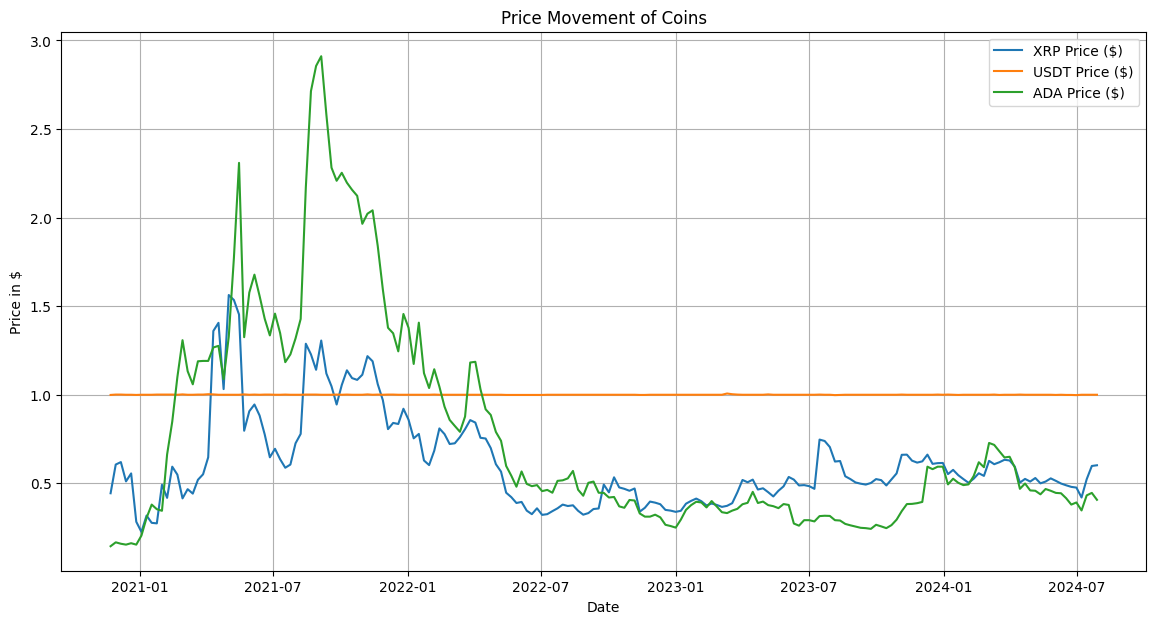

In [7]:
from analysis_and_visualization import plot_prices
plot_prices(dict_3, "Price ($)")

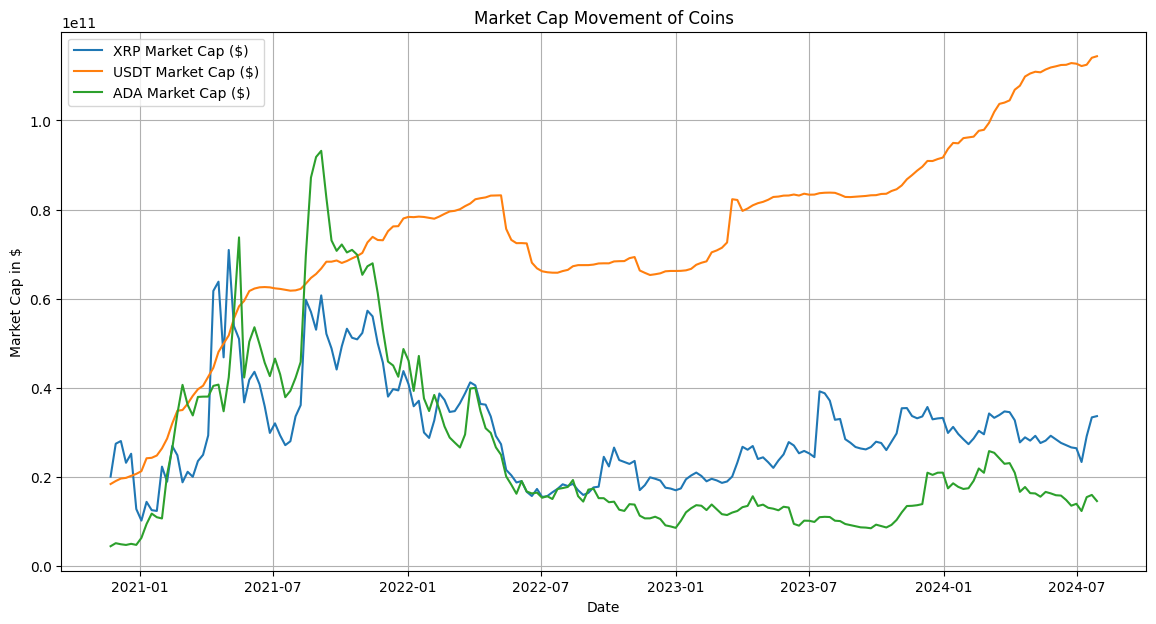

In [8]:
from analysis_and_visualization import plot_market_cap

plot_market_cap(dict_3)

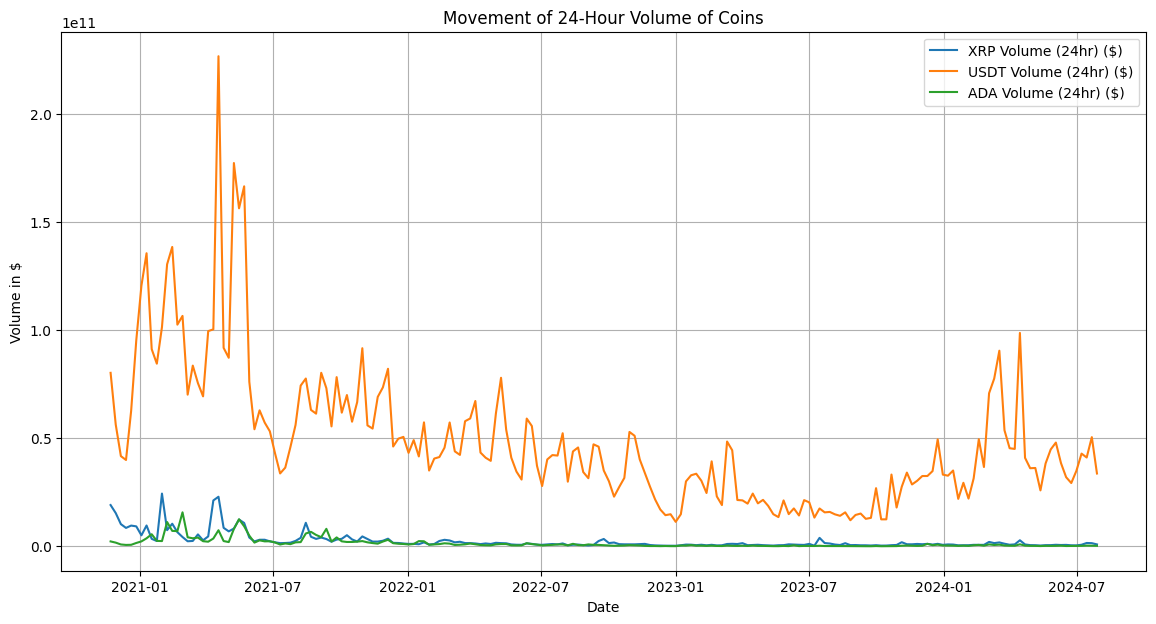

In [9]:
from analysis_and_visualization import plot_volume

plot_volume(dict_3)

### Correlation analysis

Correlation analysis, also known as bivariate, is primarily concerned with finding out whether a relationship exists between variables and then determining the magnitude and action of that relationship. With statistical tools in Python, we can calculate correlation matrix and then interpret it. Below are calculations and interpretation:


In [10]:
from analysis_and_visualization import calculate_correlation_matrix

corr_matrix_all = calculate_correlation_matrix(df2, ['Market Cap ($)', 'Price ($)', 'Circulating Supply ($)', 'Volume (24hr) ($)', '% 7d'])
corr_matrix_all

,Market Cap ($),Price ($),Circulating Supply ($),Volume (24hr) ($),% 7d
Market Cap ($),1.000000,0.955674,-0.014338,0.304370,-0.015863
Price ($),0.955674,1.000000,-0.011224,0.266340,-0.013489
Circulating Supply ($),-0.014338,-0.011224,1.000000,-0.008905,0.127894
Volume (24hr) ($),0.304370,0.266340,-0.008905,1.000000,0.012725
% 7d,-0.015863,-0.013489,0.127894,0.012725,1.000000


We can see immediately that Market cap and Price have a significant positive correlation, implying that coins with higher market cap are most likely to have higher prices. On the other hand 7-day percentage change in price does not have any correlation (strong or moderate) with other variables, implying that some variables that influence short-term price changes most, are left out of this dataset. From correlation matrix above, we can also conclude that coins with a larger market cap generally have higher trading volume and price (moderate positive correlation).

### Volatility and trends 

Investors differ from one another; some are more risk-averse, while others are less so. It is difficult to assess the volatility of a cryptocurrency from any of the graphs above. Generally, investors are risk-averse, so it is in our interest to find a way to determine and differentiate cryptocurrency volatilities from historical data. The more often the daily return is "large" in absolute value, the more volatile the cryptocurrency is, as its price has increased/decreased significantly. We will use data from the observed period and display how the weekly returns are distributed for each of the observed cryptocurrencies with transparent histograms.

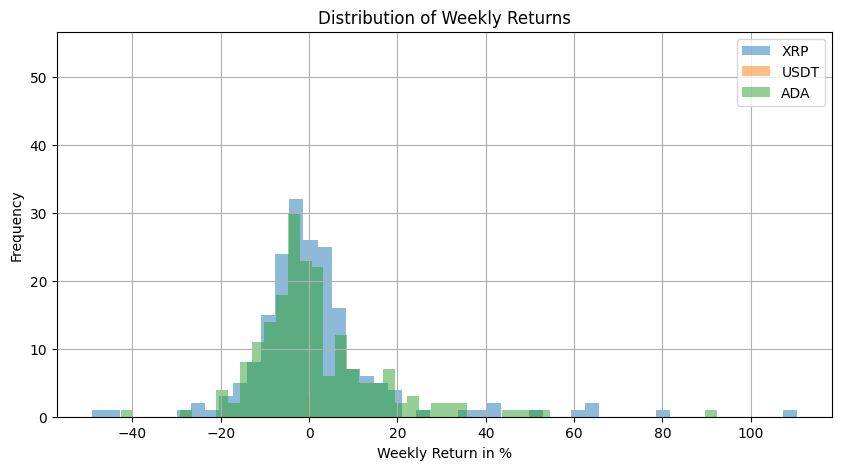

In [11]:
from analysis_and_visualization import plot_volatility

plot_volatility(dict_3)

The wider the histogram, the more volatile the cryptocurrency. The width of the histogram is related to the standard deviation of the distribution of daily returns. Recall that the standard deviation is the square root of the variance. From the above display, it seems apparent that XRP is the most volatile, as it has the widest histogram. We can confirm this by calculating the standard deviations of the daily returns for the cryptocurrencies, thus verifying our observation.

In [12]:
from analysis_and_visualization import weekly_volatility

weekly_volatility(dict_3)

Weekly Volatility:
XRP:  17.38 %
USDT:  0.09 %
ADA:  14.84 %


As we can see from the cryptocurrency price movement graph and others above, cryptocurrency prices change rapidly, resulting in a "jagged" and slightly unclear graph. To observe and identify trends, we add a column to the tables containing the moving average (e.g., 14-day) for the adjusted closing price and display the price movement trends on the graph.

### Performance and cumulative returns

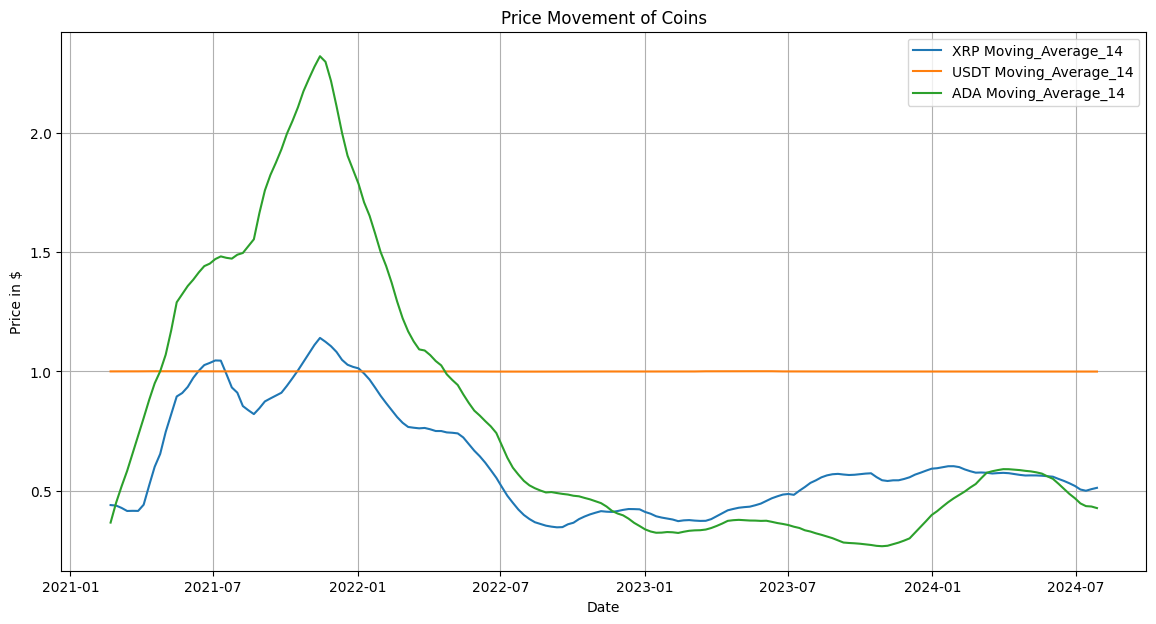

In [13]:
from analysis_and_visualization import moving_average, plot_prices

dict_3_av = moving_average(dict_3, 14)
plot_prices(dict_3_av, "Moving_Average_14")



Now we are going to present the weekly cumulative returns of multiple cryptocurrencies over time. Each line represents a different cryptocurrency, showing how its cumulative return has evolved on a weekly basis. By comparing these lines, we can observe the relative performance and growth trends of the cryptocurrencies, helping to identify which ones have had higher returns and how their performance fluctuates over the observed period.

In [14]:
from analysis_and_visualization import interactive_cumulative

interactive_cumulative(dict_3)